In [ ]:
# Load core Python libraries required for data manipulation,
# numerical computation, and text processing used throughout
# the analysis pipeline.

#Installing necessary libraries

!pip install pandas numpy scikit-learn transformers torch

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline


In [ ]:
# Load core Python libraries required for data manipulation,
# numerical computation, and text processing used throughout
# the analysis pipeline.

# Loading the CSV
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/Group 1_Final_Synthetic_Course_Evaluation_Dataset.csv"
df = pd.read_csv(file_path)
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
          timestamp                     course_code_course_name  gender  \
0   12/07/2024 6:24  GEd 109 | Science, Technology, and Society    Male   
1   27/06/2023 7:47              ENGG 417 | On-the-Job Training    Male   
2  10/08/2024 17:53        CpEE 401 | Cognate/Elective Course 1    Male   
3  28/07/2024 15:22            CpE 401 | Computer Programming 1    Male   
4  14/05/2025 17:46           GEd 106 | Purposive Communication  Female   

    sr_code year_level    faculty_name  \
0  25-98454   1ST YEAR  Dr. Villanueva   
1  22-87797   4TH YEAR      Dr. Garcia   
2  24-18595   2ND YEAR        Dr. Wong   
3  25-45834   1ST YEAR       Dr. Perez   
4  25-94286   1ST YEAR         Dr. Lee   

                                comments_suggestions  A1  A2  A3  ...  C2  C3  \
0         There's a noticeable lack of availability.   5   4   4  ...   5   4   
1    

In [ ]:
# Execute a core analytical step in the workflow that transforms
# the data into a form suitable for subsequent analysis stages.
#Detecting missing values

missing_values = df.isnull().sum()
print(missing_values)


timestamp                  0
course_code_course_name    0
gender                     0
sr_code                    0
year_level                 0
faculty_name               0
comments_suggestions       0
A1                         0
A2                         0
A3                         0
A4                         0
A5                         0
B1                         0
B2                         0
B3                         0
B4                         0
B5                         0
C1                         0
C2                         0
C3                         0
C4                         0
C5                         0
D1                         0
D2                         0
D3                         0
D4                         0
D5                         0
S1                         0
dtype: int64


In [ ]:
# Clean the dataset by handling missing values and removing
# unnecessary or invalid records to ensure data consistency
# before performing any analytical operations.

# Identify columns A1 to S1
rating_cols = ['A1','A2','A3','A4','A5',
               'B1','B2','B3','B4','B5',
               'C1','C2','C3','C4','C5',
               'D1','D2','D3','D4','D5',
               'S1']

# Drop blank comments
df = df.dropna(subset=['comments_suggestions'])

# Convert A1-S1 to numeric
for col in rating_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

df.head()


,timestamp,course_code_course_name,gender,sr_code,year_level,faculty_name,comments_suggestions,A1,A2,A3,...,C2,C3,C4,C5,D1,D2,D3,D4,D5,S1
0,12/07/2024 6:24,"GEd 109 | Science, Technology, and Society",Male,25-98454,1ST YEAR,Dr. Villanueva,There's a noticeable lack of availability.,5,4,4,...,5,4,4,3,4,5,4,2,5,3
1,27/06/2023 7:47,ENGG 417 | On-the-Job Training,Male,22-87797,4TH YEAR,Dr. Garcia,Very effective in syllabus discussion.,4,4,5,...,4,5,5,5,5,5,5,4,4,4
2,10/08/2024 17:53,CpEE 401 | Cognate/Elective Course 1,Male,24-18595,2ND YEAR,Dr. Wong,Madalas siyang hindi handa sa punctuality.,3,3,3,...,1,3,2,4,3,3,3,4,3,3
3,28/07/2024 15:22,CpE 401 | Computer Programming 1,Male,25-45834,1ST YEAR,Dr. Perez,Sobrang galing ng instructor sa availability. ...,3,5,4,...,4,3,2,2,1,1,2,3,2,3
4,14/05/2025 17:46,GEd 106 | Purposive Communication,Female,25-94286,1ST YEAR,Dr. Lee,The faculty is truly a master of record keepin...,2,3,2,...,3,4,2,4,2,3,4,3,4,3


In [ ]:
# Load core Python libraries required for data manipulation,
# numerical computation, and text processing used throughout
# the analysis pipeline.

from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Process student comment text to generate sentiment-related
# features that summarize the emotional tone of feedback
# provided in written evaluations.

# Apply VADER sentiment to comments_suggestions
df['sentiment'] = df['comments_suggestions'].apply(lambda x: sia.polarity_scores(x)['compound'])


In [ ]:
# Process student comment text to generate sentiment-related
# features that summarize the emotional tone of feedback
# provided in written evaluations.

def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment'].apply(categorize_sentiment)


In [ ]:
# Process student comment text to generate sentiment-related
# features that summarize the emotional tone of feedback
# provided in written evaluations.

rating_df = df[rating_cols + ['sentiment']]

rating_df.corr()['sentiment'].sort_values(ascending=False)


,sentiment
sentiment,1.000000
A5,0.253067
C3,0.252924
B3,0.250726
B2,0.250595
D1,0.250422
B1,0.249939
D2,0.249547
A1,0.249224
A2,0.249156


In [ ]:
# Load core Python libraries required for data manipulation,
# numerical computation, and text processing used throughout
# the analysis pipeline.

from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

df['sentiment_score'] = df['comments_suggestions'].apply(
    lambda text: sia.polarity_scores(text)['compound']
)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Load core Python libraries required for data manipulation,
# numerical computation, and text processing used throughout
# the analysis pipeline.

import re

rating_cols = [col for col in df.columns if re.match(r'^[A-S][1-5]$', col)]
print("Rating columns found:", rating_cols)


Rating columns found: ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'S1']


In [ ]:
# Load core Python libraries required for data manipulation,
# numerical computation, and text processing used throughout
# the analysis pipeline.

from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Load core Python libraries required for data manipulation,
# numerical computation, and text processing used throughout
# the analysis pipeline.

import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon', quiet=True)

# Initialize VADER
sia = SentimentIntensityAnalyzer()


def custom_sentiment(text):
    """
    Sentiment analysis using VADER
    """
    t = str(text).lower()
    vader_score = sia.polarity_scores(t)["compound"]

    if vader_score >= 0.05:
        return "Positive"
    elif vader_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"


def rating_sentiment(score):
    """
    Convert numerical rating to sentiment
    Returns: 'Positive', 'Negative', or 'Neutral'
    """
    if score >= 3.6:
        return "Positive"
    elif score <= 2.4:
        return "Negative"
    else:
        return "Neutral"


def combine_sentiments(rating, comment):
    """
    Merge rating and comment sentiments with priority rules
    Returns: 'Positive', 'Negative', or 'Neutral'
    """
    if rating == comment:
        return rating
    if comment != "Neutral":
        return comment
    return rating


# Identify all rating columns
rating_cols = [col for col in df.columns if col in [
    'A1', 'A2', 'A3', 'A4', 'A5',
    'B1', 'B2', 'B3', 'B4', 'B5',
    'C1', 'C2', 'C3', 'C4', 'C5',
    'D1', 'D2', 'D3', 'D4', 'D5',
    'S1'
]]

# Calculate mean rating
df["rating_mean"] = df[rating_cols].mean(axis=1)

# Analyze sentiments
df["rating_sentiment"] = df["rating_mean"].apply(rating_sentiment)
df["comment_sentiment"] = df["comments_suggestions"].apply(custom_sentiment)
df["final_sentiment"] = df.apply(
    lambda row: combine_sentiments(row["rating_sentiment"], row["comment_sentiment"]),
    axis=1
)

# Display results
print("SENTIMENT ANALYSIS RESULTS")
results_df = df[[
    "comments_suggestions",
    "rating_mean",
    "rating_sentiment",
    "comment_sentiment",
    "final_sentiment"
]].head(22)
display(results_df)

# Save to CSV
output_path = "/content/drive/MyDrive/Course_Evaluation_with_Sentiment.csv"
df.to_csv(output_path, index=False)
print(f"CSV saved to: {output_path}")


SENTIMENT ANALYSIS RESULTS


,comments_suggestions,rating_mean,rating_sentiment,comment_sentiment,final_sentiment
0,There's a noticeable lack of availability.,4.142857,Positive,Negative,Negative
1,Very effective in syllabus discussion.,4.476190,Positive,Positive,Positive
2,Madalas siyang hindi handa sa punctuality.,3.095238,Neutral,Neutral,Neutral
3,Sobrang galing ng instructor sa availability. ...,2.619048,Neutral,Positive,Positive
4,The faculty is truly a master of record keepin...,3.285714,Neutral,Positive,Positive
5,I highly appreciate the effort in materials us...,3.666667,Positive,Positive,Positive
6,I highly appreciate the effort in syllabus dis...,4.809524,Positive,Positive,Positive
7,The instructor showed excellent syllabus discu...,4.047619,Positive,Positive,Positive
8,His/Her critical thinking is top-notch. Very h...,2.809524,Neutral,Positive,Positive
9,Mahusay ang guro sa pagpapakita ng syllabus di...,4.095238,Positive,Neutral,Positive


CSV saved to: /content/drive/MyDrive/Course_Evaluation_with_Sentiment.csv


In [ ]:
# Process student comment text to generate sentiment-related
# features that summarize the emotional tone of feedback
# provided in written evaluations.

# Code to calculate the final counts
df['comment_sentiment'].value_counts()


,count
comment_sentiment,
Positive,32077
Neutral,14479
Negative,3444



Distribution of Final Sentiment:
final_sentiment
Positive    36961
Negative     8398
Neutral      4641
Name: count, dtype: int64


/tmp/ipython-input-3676600755.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=final_sentiment_counts.index, y=final_sentiment_counts.values, palette='viridis')


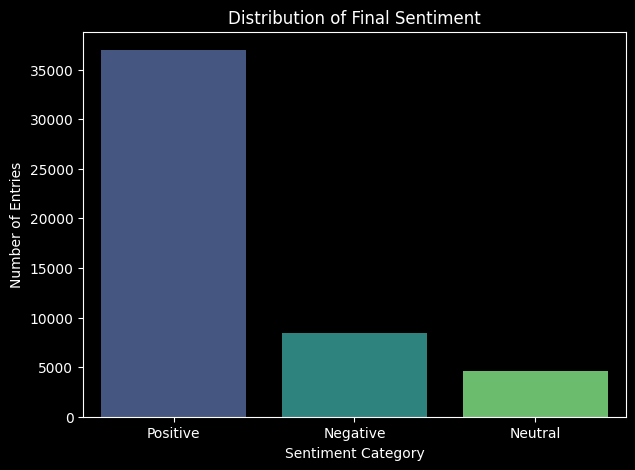

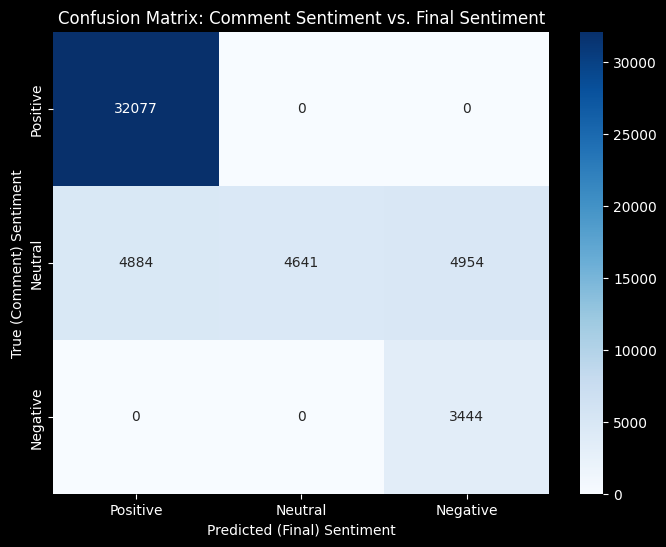


Percentage of entries where Comment Sentiment and Final Sentiment agree: 80.32%


In [ ]:
# Load core Python libraries required for data manipulation,
# numerical computation, and text processing used throughout
# the analysis pipeline.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Distribution of Final Sentiment
print("\nDistribution of Final Sentiment:")
final_sentiment_counts = df['final_sentiment'].value_counts()
print(final_sentiment_counts)

plt.figure(figsize=(7, 5))
sns.barplot(x=final_sentiment_counts.index, y=final_sentiment_counts.values, palette='viridis')
plt.title('Distribution of Final Sentiment')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Entries')
plt.show()

# 2. Confusion Matrix between Comment Sentiment and Final Sentiment
sentiment_categories = ['Positive', 'Neutral', 'Negative']

cm = confusion_matrix(
    df['comment_sentiment'],
    df['final_sentiment'],
    labels=sentiment_categories
)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=sentiment_categories,
    yticklabels=sentiment_categories
)
plt.title('Confusion Matrix: Comment Sentiment vs. Final Sentiment')
plt.xlabel('Predicted (Final) Sentiment')
plt.ylabel('True (Comment) Sentiment') # 'True' here refers to the direct comment sentiment
plt.show()

# Calculate agreement percentage
agreement = (df['comment_sentiment'] == df['final_sentiment']).mean() * 100
print(f"\nPercentage of entries where Comment Sentiment and Final Sentiment agree: {agreement:.2f}%")


/tmp/ipython-input-3399127245.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='sentiment_label', data=df, palette=colors)


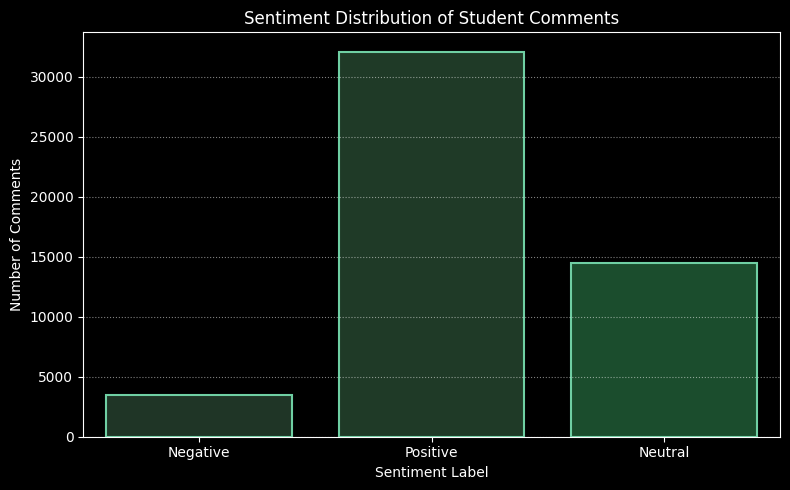

In [ ]:
# Load core Python libraries required for data manipulation,
# numerical computation, and text processing used throughout
# the analysis pipeline.

import seaborn as sns
import matplotlib.pyplot as plt

colors = [
    (0x1B/255, 0x39/255, 0x25/255, 0.7),  # #1B3925
    (0x1B/255, 0x3E/255, 0x25/255, 0.7),  # #1B3E25
    (0x13/255, 0x55/255, 0x2A/255, 0.7)   # #13552A
]

bar_edge_color = '#6FCFA3'

plt.figure(figsize=(8, 5))
plt.style.use('dark_background')

ax = sns.countplot(x='sentiment_label', data=df, palette=colors)

for patch in ax.patches:
    patch.set_edgecolor(bar_edge_color)
    patch.set_linewidth(1.5)

plt.grid(axis='y', linestyle=':', color='white', alpha=0.5)

plt.title('Sentiment Distribution of Student Comments', color='white')
plt.xlabel('Sentiment Label', color='white')
plt.ylabel('Number of Comments', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

plt.tight_layout()
plt.show()


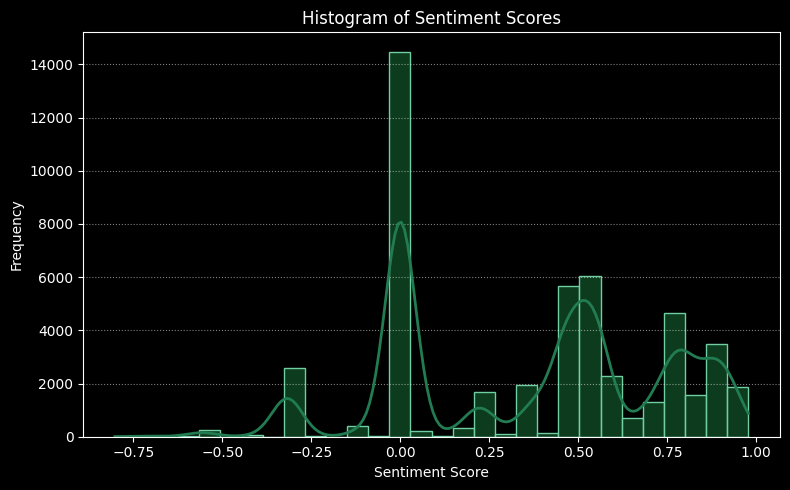

In [ ]:
# Load core Python libraries required for data manipulation,
# numerical computation, and text processing used throughout
# the analysis pipeline.

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.style.use('dark_background')

bar_color = '#13552A'
kde_color = '#227C52'
bar_edge_color = '#6FCFA3'

sns.histplot(
    df['sentiment'],
    bins=30,
    kde=True,
    color=bar_color,
    edgecolor=bar_edge_color,
    alpha=0.7
)

ax = plt.gca()
for line in ax.lines:
    line.set_color(kde_color)
    line.set_linewidth(2)

plt.grid(axis='y', linestyle=':', color='white', alpha=0.5)

plt.title('Histogram of Sentiment Scores', color='white')
plt.xlabel('Sentiment Score', color='white')
plt.ylabel('Frequency', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

plt.tight_layout()
plt.show()


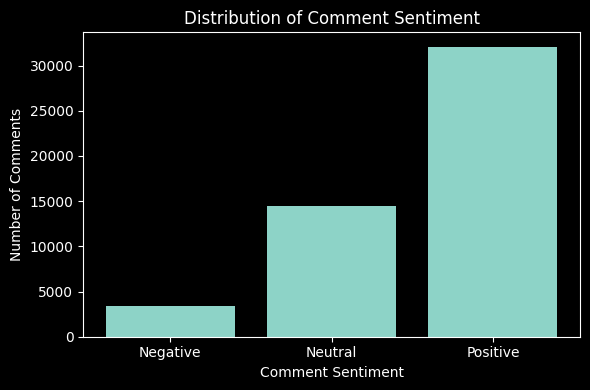

In [ ]:
# Load core Python libraries required for data manipulation,
# numerical computation, and text processing used throughout
# the analysis pipeline.

import matplotlib.pyplot as plt

sent_counts = df['comment_sentiment'].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(sent_counts.index, sent_counts.values)
plt.xlabel("Comment Sentiment")
plt.ylabel("Number of Comments")
plt.title("Distribution of Comment Sentiment")
plt.tight_layout()
plt.show()


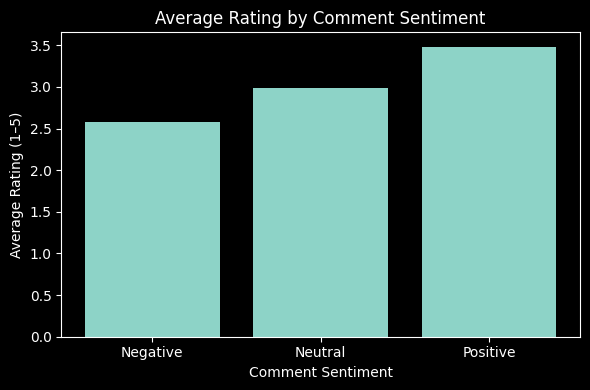

In [ ]:
# Process student comment text to generate sentiment-related
# features that summarize the emotional tone of feedback
# provided in written evaluations.

avg_rating = df.groupby("comment_sentiment")["rating_mean"].mean()

plt.figure(figsize=(6,4))
plt.bar(avg_rating.index, avg_rating.values)
plt.xlabel("Comment Sentiment")
plt.ylabel("Average Rating (1–5)")
plt.title("Average Rating by Comment Sentiment")
plt.tight_layout()
plt.show()


In [ ]:
# Process student comment text to generate sentiment-related
# features that summarize the emotional tone of feedback
# provided in written evaluations.

columns_to_save = [
    'timestamp',
    'course_code_course_name',
    'gender',
    'sr_code',
    'year_level',
    'faculty_name',
    'comments_suggestions',
    'A1',
    'A2',
    'A3',
    'A4',
    'A5',
    'B1',
    'B2',
    'B3',
    'B4',
    'B5',
    'C1',
    'C2',
    'C3',
    'C4',
    'C5',
    'D1',
    'D2',
    'D3',
    'D4',
    'D5',
    'S1',
    'sentiment',
    'sentiment_label',
    'sentiment_score',
    'comment_sentiment',
    'rating_mean',
    'rating_sentiment',
    'final_sentiment',
    'overall_evaluation',
    'commitment_score',
    'knowledge_score',
    'independent_learning_score',
    'management_score',
    'evaluation_average_score',
    'average_rating',
    'Total_Performance_Score',
    'Is_Eligible',
    'avg_rating'
]

# Filter out any columns that might not exist in the DataFrame yet
existing_columns = [col for col in columns_to_save if col in df.columns]

saved_df = df[existing_columns].copy()

output_file_path = "full_sentiment_and_evaluation_results.csv"
saved_df.to_csv(output_file_path, index=False)
print(f"All specified results saved to {output_file_path}")

All specified results saved to full_sentiment_and_evaluation_results.csv


In [ ]:
# Process student comment text to generate sentiment-related
# features that summarize the emotional tone of feedback
# provided in written evaluations.

selected_sentiment_cols = [
    'sentiment',
    'sentiment_label',
    'sentiment_score',
    'comment_sentiment',
    'rating_mean',
    'rating_sentiment',
    'final_sentiment'
]

sentiment_output_df = df[selected_sentiment_cols].copy()

output_file_path_specific = "sentiment_analysis_specific_results.csv"
sentiment_output_df.to_csv(output_file_path_specific, index=False)
print(f"Specific sentiment analysis results saved to {output_file_path_specific}")

Specific sentiment analysis results saved to sentiment_analysis_specific_results.csv


In [ ]:
# Aggregate evaluation scores and related attributes to compute
# summary statistics that support higher-level performance
# analysis and interpretation.

course_professor_counts = df.groupby('course_code_course_name')['faculty_name'].nunique()
print(course_professor_counts)

course_code_course_name
CpE 401 | Computer Programming 1                  2
CpE 403 | Cognate/Elective Course 3               5
CpE 403 | Computer Engineering as a Discipline    4
CpE 404 | Programming Logic and Design            1
CpE 405 | Discrete Mathematics                    4
                                                 ..
PE 103 | Individual and Dual Sports               2
PE 104 | Team Sports                              4
SCI 401 | General Chemistry                       1
SCI 402 | Modern Biology                          2
SCI 403 | Physics 1                               5
Name: faculty_name, Length: 67, dtype: int64


# **Supervised Classification**

In [ ]:
# Execute a core analytical step in the workflow that transforms
# the data into a form suitable for subsequent analysis stages.

df.columns

Index(['timestamp', 'course_code_course_name', 'gender', 'sr_code',
       'year_level', 'faculty_name', 'comments_suggestions', 'A1', 'A2', 'A3',
       'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5',
       'D1', 'D2', 'D3', 'D4', 'D5', 'S1', 'sentiment', 'sentiment_label',
       'sentiment_score', 'rating_mean', 'rating_sentiment',
       'comment_sentiment', 'final_sentiment'],
      dtype='object')

In [ ]:
# Aggregate evaluation scores and related attributes to compute
# summary statistics that support higher-level performance
# analysis and interpretation.

# Define all the rating columns (A1-D5)
all_rating_cols = ['A1','A2','A3','A4','A5',
                   'B1','B2','B3','B4','B5',
                   'C1','C2','C3','C4','C5',
                   'D1','D2','D3','D4','D5']

# Calculate the mean of all 20 rating items (A1-D5) to create a single overall score.
df['overall_evaluation'] = df[all_rating_cols].mean(axis=1)

print("Created 'overall_evaluation' by averaging A1-D5 ratings.")
print(df[['overall_evaluation']].head())

Created 'overall_evaluation' by averaging A1-D5 ratings.
   overall_evaluation
0                 4.2
1                 4.5
2                 3.1
3                 2.6
4                 3.3


In [ ]:
# Aggregate evaluation scores and related attributes to compute
# summary statistics that support higher-level performance
# analysis and interpretation.

# Calculate the four category scores (mean of A1-A5, B1-B5, etc.)
df['commitment_score'] = df[['A1','A2','A3','A4','A5']].mean(axis=1)
df['knowledge_score'] = df[['B1','B2','B3','B4','B5']].mean(axis=1)
df['independent_learning_score'] = df[['C1','C2','C3','C4','C5']].mean(axis=1)
df['management_score'] = df[['D1','D2','D3','D4','D5']].mean(axis=1)

In [ ]:
# Load core Python libraries required for data manipulation,
# numerical computation, and text processing used throughout
# the analysis pipeline.

from scipy.stats import mode

aggregation_functions = {
    # Aggregate the NUMERIC overall score (now created)
    'overall_evaluation': 'mean',

    # Taking the average of the four category scores
    'commitment_score': 'mean',
    'knowledge_score': 'mean',
    'independent_learning_score': 'mean',
    'management_score': 'mean',
}

df_faculty = df.groupby('faculty_name').agg(aggregation_functions).reset_index()
df_faculty = df_faculty.rename(
    columns={'overall_evaluation': 'faculty_avg_overall_score'}
)

In [ ]:
# Execute a core analytical step in the workflow that transforms
# the data into a form suitable for subsequent analysis stages.

def classify_score(score):
    # Classifies the faculty's average score into High, Average, or Low.
    if score >= 4:
        return "High"
    elif score >= 3:
        return "Average"
    else:
        return "Low"

df_faculty['faculty_performance_class'] = df_faculty['faculty_avg_overall_score'].apply(classify_score)
target_mapping = {'Low': 0, 'Average': 1, 'High': 2}
df_faculty['target_encoded'] = df_faculty['faculty_performance_class'].map(target_mapping)

print("Faculty Target Variable Distribution:")
print(df_faculty['faculty_performance_class'].value_counts())

Faculty Target Variable Distribution:
faculty_performance_class
Average    6
Low        5
High       3
Name: count, dtype: int64


/tmp/ipython-input-2294429159.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


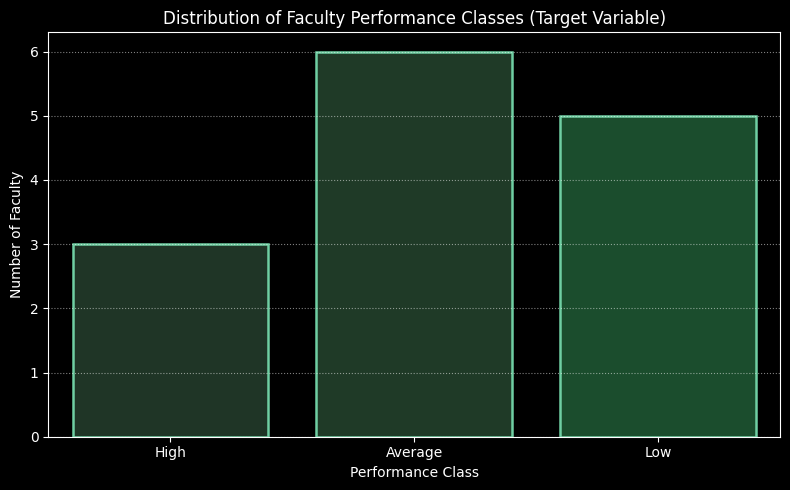

/tmp/ipython-input-2294429159.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


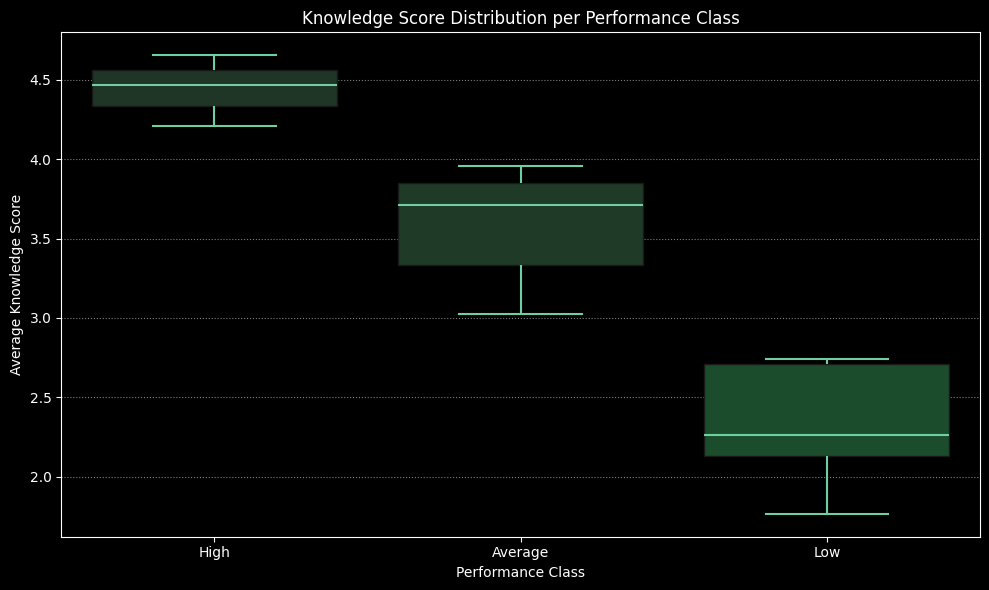

In [ ]:
# Load core Python libraries required for data manipulation,
# numerical computation, and text processing used throughout
# the analysis pipeline.

import seaborn as sns
import matplotlib.pyplot as plt

colors = [
    (0x1B/255, 0x39/255, 0x25/255, 0.7),  # #1B3925
    (0x1B/255, 0x3E/255, 0x25/255, 0.7),  # #1B3E25
    (0x13/255, 0x55/255, 0x2A/255, 0.7)   # #13552A
]

bar_edge_color = '#6FCFA3'
box_border = '#6FCFA3'
# 1) CLASS DISTRIBUTION PLOT


plt.figure(figsize=(8, 5))
plt.style.use('dark_background')

ax = sns.countplot(
    x='faculty_performance_class',
    data=df_faculty,
    order=['High', 'Average', 'Low'],
    palette=colors
)

plt.grid(axis='y', linestyle=':', color='white', alpha=0.5)

for patch in ax.patches:
    patch.set_edgecolor(bar_edge_color)
    patch.set_linewidth(1.8)


plt.title('Distribution of Faculty Performance Classes (Target Variable)', color='white')
plt.xlabel('Performance Class', color='white')
plt.ylabel('Number of Faculty', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

plt.tight_layout()
plt.show()



# 2) KNOWLEDGE SCORE BOXPLOT

plt.figure(figsize=(10, 6))
plt.style.use('dark_background')

ax = sns.boxplot(
    x='faculty_performance_class',
    y='knowledge_score',
    data=df_faculty,
    order=['High', 'Average', 'Low'],
    palette=colors
)


plt.grid(axis='y', linestyle=':', color='white', alpha=0.5)

for patch in ax.artists:
    patch.set_edgecolor(box_border)
    patch.set_linewidth(2)

for line in ax.lines:
    line.set_color(box_border)
    line.set_linewidth(1.5)

plt.title('Knowledge Score Distribution per Performance Class', color='white')
plt.xlabel('Performance Class', color='white')
plt.ylabel('Average Knowledge Score', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

plt.tight_layout()
plt.show()

In [ ]:
# Execute a core analytical step in the workflow that transforms
# the data into a form suitable for subsequent analysis stages.

feature_cols = [
    'commitment_score',
    'knowledge_score',
    'independent_learning_score',
    'management_score'
]

X = df_faculty[feature_cols]
y = df_faculty['target_encoded']

In [ ]:
# Load core Python libraries required for data manipulation,
# numerical computation, and text processing used throughout
# the analysis pipeline.

from sklearn.model_selection import train_test_split

# Train/Test Split (30% for testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} faculty members")
print(f"Testing set size: {X_test.shape[0]} faculty members")

Training set size: 9 faculty members
Testing set size: 5 faculty members


Model Accuracy per Class:
              precision    recall  f1-score   support

     Low (0)       1.00      1.00      1.00         2
 Average (1)       1.00      1.00      1.00         2
    High (2)       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



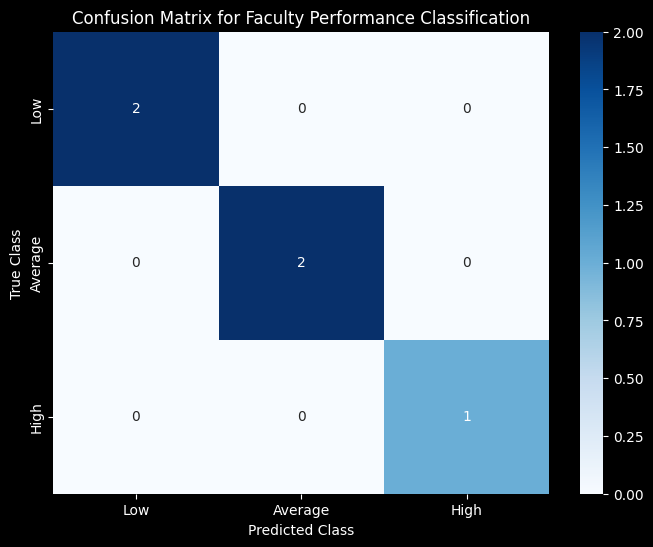

In [ ]:
# Load core Python libraries required for data manipulation,
# numerical computation, and text processing used throughout
# the analysis pipeline.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Re-define X and y for the classification model
feature_cols = [
    'commitment_score',
    'knowledge_score',
    'independent_learning_score',
    'management_score'
]
X = df_faculty[feature_cols]
y = df_faculty['target_encoded']

# Re-run Train/Test Split (30% for testing) to ensure X_train and y_train are consistent
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Generate predictions on the test set
y_pred = rf_model.predict(X_test)

print("Model Accuracy per Class:")
print(classification_report(
    y_true=y_test,
    y_pred=y_pred,
    labels=[0, 1, 2],
    target_names=['Low (0)', 'Average (1)', 'High (2)']
))

# Confusion Matrix (Missing Item 4)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Average', 'High'],
            yticklabels=['Low', 'Average', 'High'])
plt.title('Confusion Matrix for Faculty Performance Classification')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

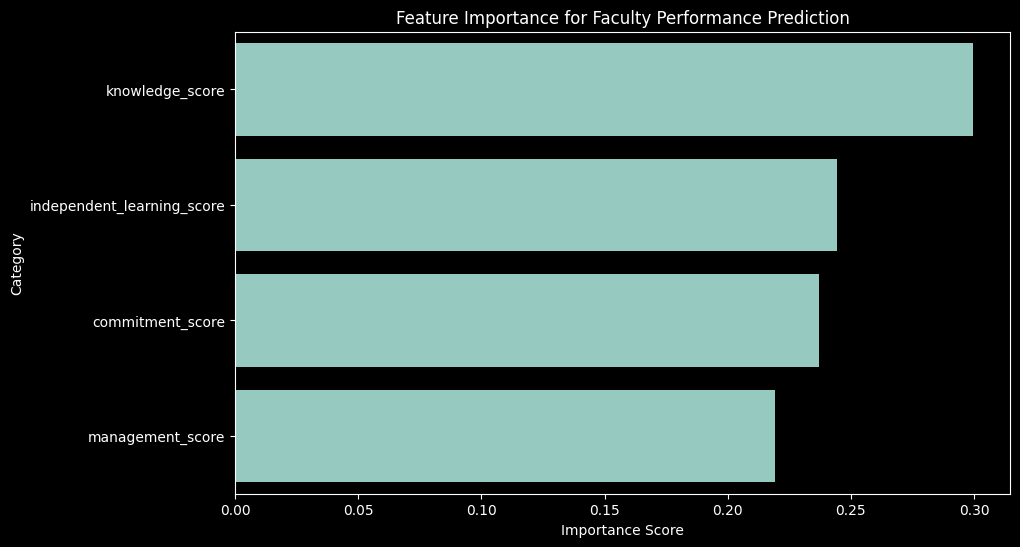


Model Interpretation: The most important category affecting performance is **Knowledge**.
This indicates that focusing efforts on **Knowledge** skills will likely have the greatest impact on raising faculty performance ratings.


In [ ]:
# Load core Python libraries required for data manipulation,
# numerical computation, and text processing used throughout
# the analysis pipeline.

# Feature Importance Plot
feature_importances = pd.Series(rf_model.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance for Faculty Performance Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Category')
plt.show()


# Interpretation (Missing Item 7)
print(f"\nModel Interpretation: The most important category affecting performance is **{feature_importances.index[0].replace('_score', '').title()}**.")
print(f"This indicates that focusing efforts on **{feature_importances.index[0].replace('_score', '').title()}** skills will likely have the greatest impact on raising faculty performance ratings.")

In [ ]:
# Execute a core analytical step in the workflow that transforms
# the data into a form suitable for subsequent analysis stages.

feature_cols_simple = [
    'commitment_score',
    'knowledge_score',
    'independent_learning_score',
    'management_score'
]

X_full = df_faculty[feature_cols_simple]
reverse_mapping = {0: 'Low', 1: 'Average', 2: 'High'}

df_faculty['predicted_class_encoded'] = rf_model.predict(X_full)
df_faculty['predicted_class'] = df_faculty['predicted_class_encoded'].map(reverse_mapping)

In [ ]:
# Aggregate evaluation scores and related attributes to compute
# summary statistics that support higher-level performance
# analysis and interpretation.

# Create the final output DataFrame including all category mean scores
final_output = df_faculty[[
    'faculty_name',
    'predicted_class',
    'faculty_avg_overall_score',
    'commitment_score',
    'knowledge_score',
    'independent_learning_score',
    'management_score'
]].sort_values(by='faculty_avg_overall_score', ascending=False)

print("\nOVERALL CLASSIFICATION OUTPUT (Top 10 Faculty by Score)")
print(final_output.head(10))


OVERALL CLASSIFICATION OUTPUT (Top 10 Faculty by Score)
      faculty_name predicted_class  faculty_avg_overall_score  \
12  Dr. Villanueva            High                   4.658381   
10       Dr. Smith            High                   4.474305   
11         Dr. Tan            High                   4.215789   
13        Dr. Wong         Average                   3.959937   
1         Dr. Cruz         Average                   3.875747   
6          Dr. Lee         Average                   3.774066   
3       Dr. Garcia         Average                   3.645524   
5          Dr. Kim         Average                   3.221743   
2        Dr. Evans         Average                   3.026776   
9        Dr. Ramos             Low                   2.740354   

    commitment_score  knowledge_score  independent_learning_score  \
12          4.653668         4.655568                    4.662942   
10          4.476956         4.467807                    4.482086   
11          4.215512

In [ ]:
# Aggregate evaluation scores and related attributes to compute
# summary statistics that support higher-level performance
# analysis and interpretation.

# CATEGORY-SPECIFIC RANKINGS

print("\nTOP FACULTY PERFORMANCE PER CATEGORY (Top 5)")

categories_to_rank = {
    'Commitment': 'commitment_score',
    'Knowledge': 'knowledge_score',
    'Independent Learning': 'independent_learning_score',
    'Management': 'management_score'
}

for category_name, col_name in categories_to_rank.items():
    # Sort the faculty data by the specific category mean score
    top_5_cat = df_faculty.sort_values(by=col_name, ascending=False).head(5)

    # Display the ranking
    print(f"\n>> Category: {category_name}")
    print(top_5_cat[['faculty_name', col_name, 'predicted_class']].rename(
        columns={col_name: f'{category_name} Score'}
    ))


TOP FACULTY PERFORMANCE PER CATEGORY (Top 5)

>> Category: Commitment
      faculty_name  Commitment Score predicted_class
12  Dr. Villanueva          4.653668            High
10       Dr. Smith          4.476956            High
11         Dr. Tan          4.215512            High
13        Dr. Wong          3.970614         Average
1         Dr. Cruz          3.879348         Average

>> Category: Knowledge
      faculty_name  Knowledge Score predicted_class
12  Dr. Villanueva         4.655568            High
10       Dr. Smith         4.467807            High
11         Dr. Tan         4.209603            High
13        Dr. Wong         3.954552         Average
1         Dr. Cruz         3.873332         Average

>> Category: Independent Learning
      faculty_name  Independent Learning Score predicted_class
12  Dr. Villanueva                    4.662942            High
10       Dr. Smith                    4.482086            High
11         Dr. Tan                    4.218052     

In [ ]:
# Aggregate evaluation scores and related attributes to compute
# summary statistics that support higher-level performance
# analysis and interpretation.

# ACTIONABLE RECOMMENDATION

low_performers_data = final_output[final_output['predicted_class'] == 'Low']

if not low_performers_data.empty:
    # Calculate the collective average score for the 'Low' performers in each category
    low_performer_avg = low_performers_data[[
        'commitment_score',
        'knowledge_score',
        'independent_learning_score',
        'management_score'
    ]].mean()

    # Find the category with the lowest collective average score
    weakest_area_raw = low_performer_avg.idxmin()
    weakest_area = weakest_area_raw.replace('_score', '').title()

    print("\nActionable Recommendation")
    print(f"Recommendation: Faculty members classified as **'Low'** show the lowest collective performance in **{weakest_area}**.")
    print(f"Action: Implement targeted training programs focused on improving **{weakest_area}** skills to boost overall performance.")
else:
    print("\nNo faculty members were classified as 'Low' performers.")


Actionable Recommendation
Recommendation: Faculty members classified as **'Low'** show the lowest collective performance in **Commitment**.
Action: Implement targeted training programs focused on improving **Commitment** skills to boost overall performance.


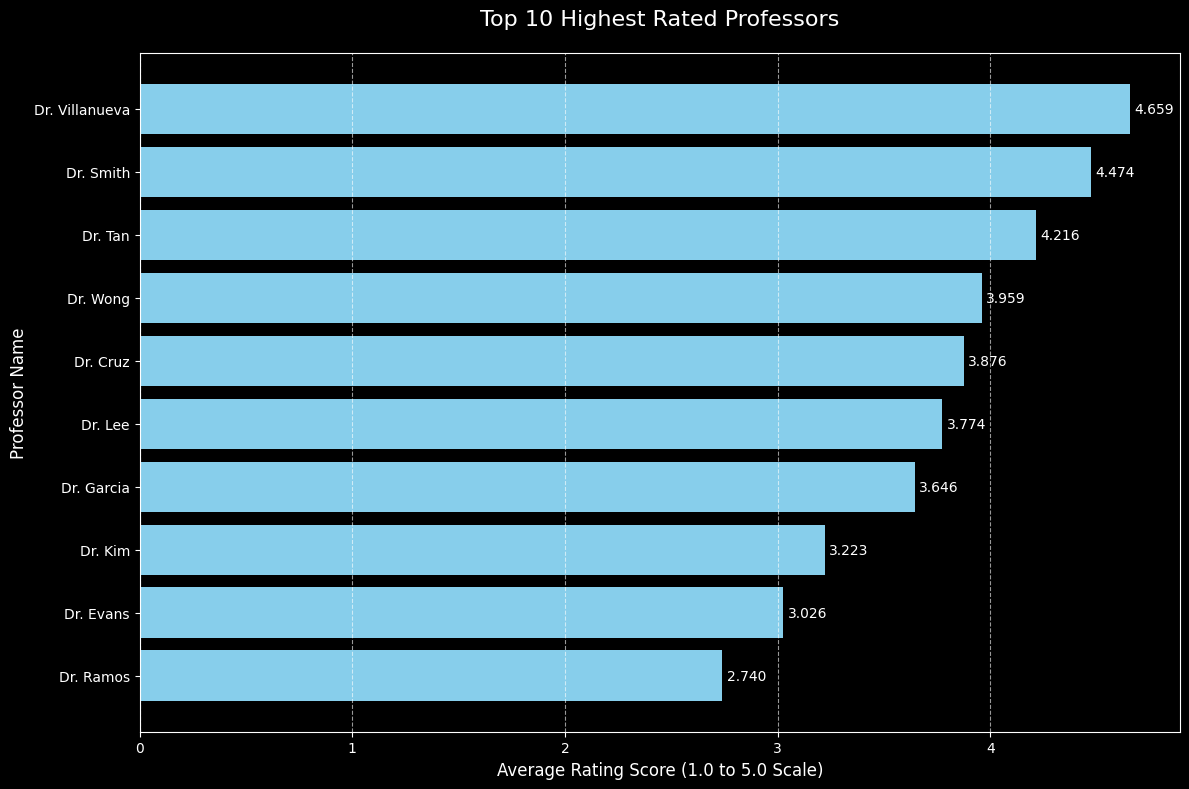

In [ ]:
# Aggregate evaluation scores and related attributes to compute
# summary statistics that support higher-level performance
# analysis and interpretation.

rating_df = df[rating_cols]
df['evaluation_average_score'] = rating_df.mean(axis=1)
prof_ratings = df.groupby('faculty_name')['evaluation_average_score'].mean()
prof_ratings_sorted = prof_ratings.sort_values(ascending=False)

top_10_profs = prof_ratings_sorted.head(10)
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_profs.index, top_10_profs.values, color='skyblue')

plt.gca().invert_yaxis()
plt.xlabel("Average Rating Score (1.0 to 5.0 Scale)", fontsize=12)
plt.ylabel("Professor Name", fontsize=12)
plt.title("Top 10 Highest Rated Professors", fontsize=16, pad=20)

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.02,
        bar.get_y() + bar.get_height() / 2,
        f'{width:.3f}',
        ha='left',
        va='center'
    )

plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [ ]:
# Load core Python libraries required for data manipulation,
# numerical computation, and text processing used throughout
# the analysis pipeline.

import pandas as pd

ratings_cols = [
    'A1', 'A2', 'A3', 'A4', 'A5',
    'B1', 'B2', 'B3', 'B4', 'B5',
    'C1', 'C2', 'C3', 'C4', 'C5',
    'D1', 'D2', 'D3', 'D4', 'D5',
    'S1'
]

df['average_rating'] = df[ratings_cols].mean(axis=1)
faculty_ratings = df.groupby('faculty_name')['average_rating'].mean()
faculty_ratings_df = faculty_ratings.to_frame(name='average_rating').reset_index()

faculty_ratings_df['rating_category'] = 10 - pd.qcut(
    faculty_ratings_df['average_rating'],
    q=10,
    labels=False,
    duplicates='drop'
)

categorized_professors = faculty_ratings_df[['faculty_name', 'average_rating', 'rating_category']].sort_values(
    by=['rating_category', 'average_rating'], ascending=[True, False]
)

print("\n--- Top 10 Rated Professors (Category 1 is Best) ---")
print(categorized_professors.head(10))


--- Top 10 Rated Professors (Category 1 is Best) ---
      faculty_name  average_rating  rating_category
12  Dr. Villanueva        4.658866                1
10       Dr. Smith        4.473625                1
11         Dr. Tan        4.215517                2
13        Dr. Wong        3.959483                3
1         Dr. Cruz        3.875541                4
6          Dr. Lee        3.774343                4
3       Dr. Garcia        3.645537                5
5          Dr. Kim        3.223236                6
2        Dr. Evans        3.026189                7
9        Dr. Ramos        2.740458                7


In [ ]:
# Load core Python libraries required for data manipulation,
# numerical computation, and text processing used throughout
# the analysis pipeline.

import pandas as pd

# --- ASSUMPTION: df is loaded and rating_cols are correct ---
ratings_cols = [
    'A1', 'A2', 'A3', 'A4', 'A5',
    'B1', 'B2', 'B3', 'B4', 'B5',
    'C1', 'C2', 'C3', 'C4', 'C5',
    'D1', 'D2', 'D3', 'D4', 'D5',
    'S1'
]

# 1. Calculate the mean rating across all rating columns for each course evaluation (row)
df['average_rating'] = df[ratings_cols].mean(axis=1)

# 2. Group by BOTH course and faculty, and calculate the mean rating for each combination.
# This gives the average rating of a specific teacher for a specific course.
course_faculty_ratings = df.groupby(['course_code_course_name', 'faculty_name'])['average_rating'].mean().reset_index()

# 3. Find the maximum average rating within each course
idx = course_faculty_ratings.groupby('course_code_course_name')['average_rating'].transform(max) == course_faculty_ratings['average_rating']

# 4. Filter the DataFrame to keep only the teacher(s) with the maximum rating for that course
best_teachers_per_course = course_faculty_ratings[idx].sort_values(
    by='average_rating',
    ascending=False
).reset_index(drop=True)

# 5. Print the results
print("\n--- Best Teacher for Each Subject ---")
# Rename for clarity
best_teachers_per_course.columns = ['Course', 'Best Teacher', 'Max Average Rating']
print(best_teachers_per_course)


--- Best Teacher for Each Subject ---
                                               Course    Best Teacher  \
0                        PE 102 | Rhythmic Activities  Dr. Villanueva   
1                         Litr 102 | ASEAN Literature  Dr. Villanueva   
2                                 SCI 403 | Physics 1  Dr. Villanueva   
3                  CpE 430 | CE Practice and Design 2  Dr. Villanueva   
4                CpE 423 | Scaling Networks (CISCO 3)  Dr. Villanueva   
..                                                ...             ...   
62                         GEd 108 | Art Appreciation         Dr. Kim   
63                CpE 420 | Digital Signal Processing       Dr. Ramos   
64                          CpE 418 | Software Design       Dr. Perez   
65  Fili 101 | Kontekstwalisadong Komunikasyon sa ...       Dr. Lopez   
66   CpE 425 | Computer Architecture and Organization        Dr. Chen   

    Max Average Rating  
0             4.782941  
1             4.739496  
2        

/tmp/ipython-input-3974823761.py:20: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  idx = course_faculty_ratings.groupby('course_code_course_name')['average_rating'].transform(max) == course_faculty_ratings['average_rating']


In [ ]:
# Clean the dataset by handling missing values and removing
# unnecessary or invalid records to ensure data consistency
# before performing any analytical operations.

# Calculate Numerical Category Scores and Target
rating_cols = [col for col in df.columns if any(group in col for group in ['A', 'B', 'C', 'D']) and len(col) == 2]
for col in rating_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(df[col].mode()[0])

df.dropna(subset=rating_cols, thresh=len(rating_cols) - 5, inplace=True)
df[rating_cols] = df[rating_cols].fillna(df[rating_cols].mean())

# Calculate Total Performance Score
df['Total_Performance_Score'] = df[rating_cols].mean(axis=1)

# Define Eligibility: Top 75th percentile of the score
eligibility_threshold = df['Total_Performance_Score'].quantile(0.75)
df['Is_Eligible'] = np.where(df['Total_Performance_Score'] >= eligibility_threshold, 1, 0)

# Aggregate by Faculty to create faculty_ranking
faculty_ranking = df.groupby('faculty_name').agg(
    Avg_Total_Score=('Total_Performance_Score', 'mean'),
    Eligibility_Proportion=('Is_Eligible', 'mean'),
    Total_Evaluations=('Total_Performance_Score', 'count')
).reset_index()

# Determine overall status: Eligible if >= 75% of evaluations were individually eligible
ELIGIBLE_THRESHOLD = 0.75
faculty_ranking['Overall_Eligible_Status'] = np.where(
    faculty_ranking['Eligibility_Proportion'] >= ELIGIBLE_THRESHOLD,
    'Eligible',
    'Not Eligible'
)

In [ ]:
# Execute a core analytical step in the workflow that transforms
# the data into a form suitable for subsequent analysis stages.

# Sort the entire faculty list by Average Total Score and take the top 5
top_5_overall = faculty_ranking.sort_values(by='Avg_Total_Score', ascending=False).head(5)

# Print Result with Eligibility Status
print("--- Top 5 Highest-Scoring Professors for Promotion (with Eligibility Status) ---")
print(top_5_overall[['faculty_name', 'Overall_Eligible_Status', 'Avg_Total_Score', 'Eligibility_Proportion']].to_markdown(index=False, floatfmt=".4f"))

--- Top 5 Highest-Scoring Professors for Promotion (with Eligibility Status) ---
| faculty_name   | Overall_Eligible_Status   |   Avg_Total_Score |   Eligibility_Proportion |
|:---------------|:--------------------------|------------------:|-------------------------:|
| Dr. Villanueva | Eligible                  |            4.6584 |                   0.7932 |
| Dr. Smith      | Not Eligible              |            4.4743 |                   0.6776 |
| Dr. Tan        | Not Eligible              |            4.2158 |                   0.5307 |
| Dr. Wong       | Not Eligible              |            3.9599 |                   0.4238 |
| Dr. Cruz       | Not Eligible              |            3.8757 |                   0.4075 |


# **Evaluation Metrics**

In [ ]:
# Execute a core analytical step in the workflow that transforms
# the data into a form suitable for subsequent analysis stages.

# Force conversion, assuming Day/Month/Year
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')

# Check how many dates failed to convert
print(f"Number of invalid dates: {df['timestamp'].isnull().sum()}")

Number of invalid dates: 0


In [ ]:
# Execute a core analytical step in the workflow that transforms
# the data into a form suitable for subsequent analysis stages.
# Ensure the conversion is done first
df['timestamp'] = pd.to_datetime(df['timestamp'], dayfirst=True, errors='coerce')

# Filter for 2025
df_2025 = df[df['timestamp'].dt.year == 2025]

# Check the size
print(f"Total number of records found in 2025: {len(df_2025)}")

Total number of records found in 2025: 12608


In [ ]:
# Execute a core analytical step in the workflow that transforms
# the data into a form suitable for subsequent analysis stages.

# Ensure the conversion is done first
df['timestamp'] = pd.to_datetime(df['timestamp'], dayfirst=True, errors='coerce')

# Filter for 2024
df_2024 = df[df['timestamp'].dt.year == 2024]

# Check the size
print(f"Total number of records found in 2024: {len(df_2024)}")

Total number of records found in 2024: 12553


In [ ]:
# Execute a core analytical step in the workflow that transforms
# the data into a form suitable for subsequent analysis stages.

# Count the evaluations submitted per year level
evaluations_per_year_level = df['year_level'].value_counts()
print(evaluations_per_year_level)


year_level
1ST YEAR    15508
3RD YEAR    13570
2ND YEAR    13425
4TH YEAR     7497
Name: count, dtype: int64


In [ ]:
# Execute a core analytical step in the workflow that transforms
# the data into a form suitable for subsequent analysis stages.

# Ensure the conversion is done first
df['timestamp'] = pd.to_datetime(df['timestamp'], dayfirst=True, errors='coerce')

# Filter for 2023
df_2023 = df[df['timestamp'].dt.year == 2023]

# Check the size
print(f"Total number of records found in 2023: {len(df_2023)}")

Total number of records found in 2023: 12492


In [ ]:
# Execute a core analytical step in the workflow that transforms
# the data into a form suitable for subsequent analysis stages.

# Ensure the conversion is done first
df['timestamp'] = pd.to_datetime(df['timestamp'], dayfirst=True, errors='coerce')

# Filter for 2022
df_2022 = df[df['timestamp'].dt.year == 2022]

# Check the size
print(f"Total number of records found in 2022: {len(df_2022)}")

Total number of records found in 2022: 12347


In [ ]:
# Execute a core analytical step in the workflow that transforms
# the data into a form suitable for subsequent analysis stages.

# Count the number of unique faculty members
unique_faculty_count = df['faculty_name'].nunique()

print(f"The total number of unique faculty members is: {unique_faculty_count}")

The total number of unique faculty members is: 14


In [ ]:
# Load core Python libraries required for data manipulation,
# numerical computation, and text processing used throughout
# the analysis pipeline.

import pandas as pd

# 1. Ensure the 'timestamp' column is correctly converted to datetime
# This is crucial for extracting the hour.
df['timestamp'] = pd.to_datetime(df['timestamp'], dayfirst=True, errors='coerce')

# Drop any rows where the timestamp conversion failed
df_cleaned = df.dropna(subset=['timestamp'])

# 2. Define a function to categorize the time based on the hour
def categorize_time_of_day(timestamp):
    hour = timestamp.hour
    if 5 <= hour < 12:
        return 'Morning (5AM - 11:59AM)'
    elif 12 <= hour < 17:  # 12:00 PM to 4:59 PM
        return 'Noon/Afternoon (12PM - 4:59PM)'
    else:  # 5:00 PM to 4:59 AM
        return 'Night/Evening (5PM - 4:59AM)'

# 3. Apply the function to create the new time category column
df_cleaned['time_period'] = df_cleaned['timestamp'].apply(categorize_time_of_day)

# 4. Count the frequency of each time period
frequency_counts = df_cleaned['time_period'].value_counts().reset_index()
frequency_counts.columns = ['Time Period', 'Total Ratings']

# 5. Determine the most frequent time
most_frequent = frequency_counts.iloc[0]

print("\n--- Rating Submission Frequency by Time of Day ---")
print(frequency_counts)

print("\n-------------------------------------------------")
print(f"The students most frequently did the rating during the:")
print(f"  🏆 **{most_frequent['Time Period']}** (Total: {most_frequent['Total Ratings']} ratings)")


--- Rating Submission Frequency by Time of Day ---
                      Time Period  Total Ratings
0    Night/Evening (5PM - 4:59AM)          24832
1         Morning (5AM - 11:59AM)          14725
2  Noon/Afternoon (12PM - 4:59PM)          10443

-------------------------------------------------
The students most frequently did the rating during the:
  🏆 **Night/Evening (5PM - 4:59AM)** (Total: 24832 ratings)


# **Time Series**

In [ ]:
# Execute a core analytical step in the workflow that transforms
# the data into a form suitable for subsequent analysis stages.

!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 34.2 MB/s eta 0:00:00


In [ ]:
# Load core Python libraries required for data manipulation,
# numerical computation, and text processing used throughout
# the analysis pipeline.

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima # Recommended for finding best p, d, q orders

In [ ]:
# Clean the dataset by handling missing values and removing
# unnecessary or invalid records to ensure data consistency
# before performing any analytical operations.

df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')

if 'avg_rating' not in df.columns:
    rating_cols = [c for c in df.columns if df[c].dtype in ['float64','int64'] and c not in ['sentiment_score']]
    df['avg_rating'] = df[rating_cols].mean(axis=1)

ts = df[['timestamp', 'avg_rating', 'sentiment_score']].copy()
ts = ts.set_index('timestamp').resample('W').mean().dropna()
ts = ts.rename(columns={'avg_rating':'Y', 'sentiment_score':'X'})

ts.head()

,Y,X
timestamp,,
2022-01-02,2.628402,0.293346
2022-01-09,3.035037,0.360568
2022-01-16,3.076072,0.374914
2022-01-23,2.951261,0.377855
2022-01-30,2.834525,0.391468


In [ ]:
# Execute a core analytical step in the workflow that transforms
# the data into a form suitable for subsequent analysis stages.

print(ts.shape)
print(ts.index.min(), "→", ts.index.max())
ts.describe()

(210, 2)
2022-01-02 00:00:00 → 2026-01-04 00:00:00


,Y,X
count,210.000000,210.000000
mean,3.090481,0.370649
std,0.101105,0.025261
min,2.628402,0.293346
25%,3.024666,0.352993
50%,3.089598,0.371353
75%,3.156755,0.390382
max,3.373551,0.429719


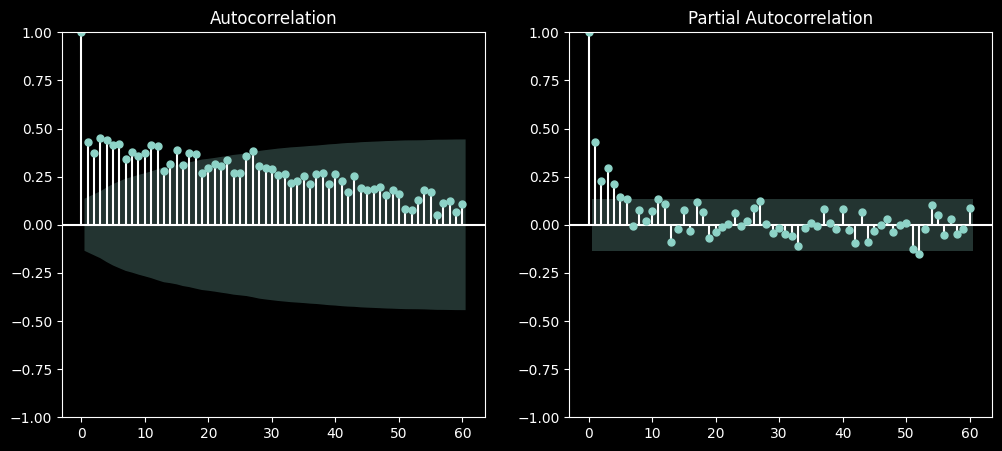

ADF Statistic: -1.0737549062536451
p-value: 0.7254238795688196


In [ ]:
# Load core Python libraries required for data manipulation,
# numerical computation, and text processing used throughout
# the analysis pipeline.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plot_acf(ts['Y'], lags=60, ax=plt.gca())

plt.subplot(1,2,2)
plot_pacf(ts['Y'], lags=60, ax=plt.gca())

plt.show()

result = adfuller(ts['Y'])

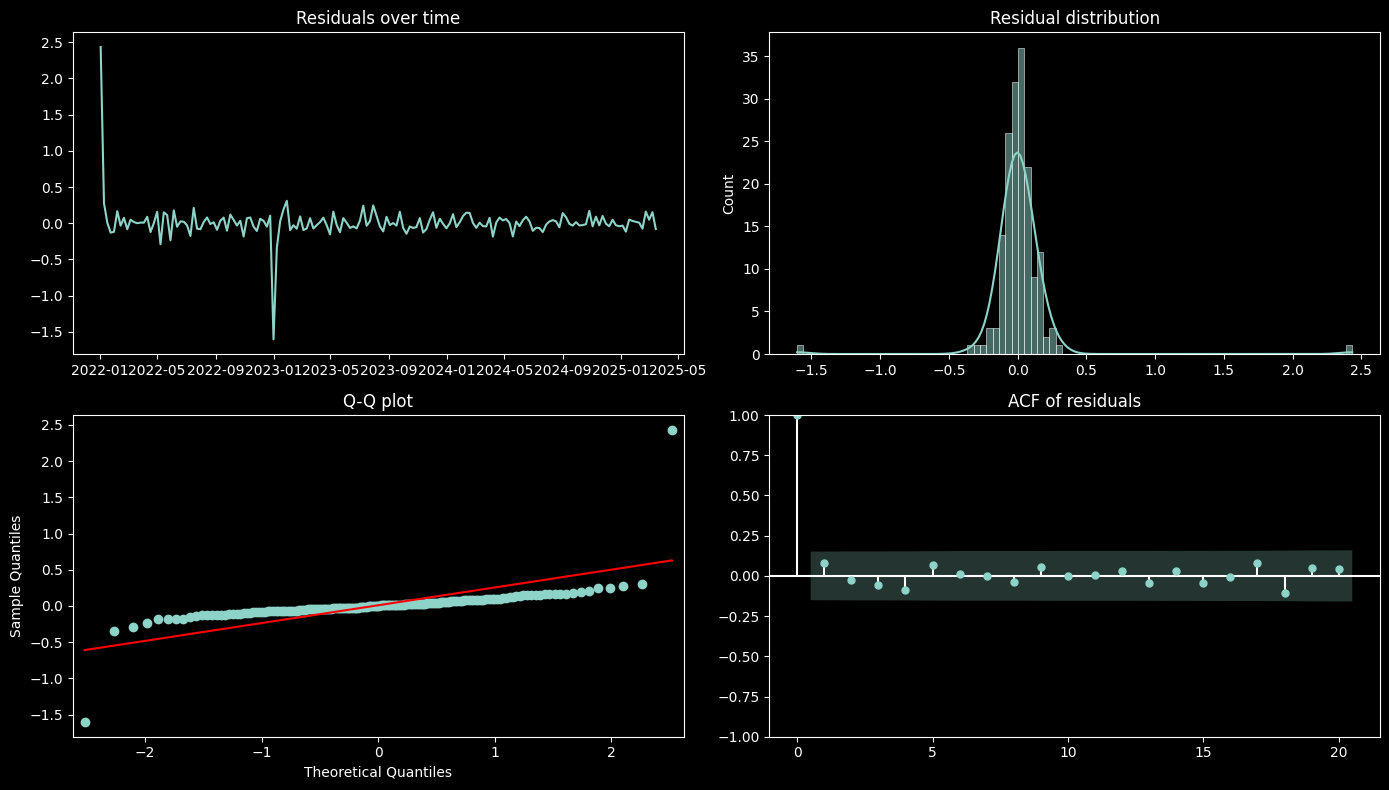

Residual mean: 0.009531007903424486
Residual std: 0.24658506715868306


In [ ]:
# Load core Python libraries required for data manipulation,
# numerical computation, and text processing used throughout
# the analysis pipeline.

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

resid = res.resid.dropna()

plt.figure(figsize=(14,8))

# 1. Residual time series
plt.subplot(2,2,1)
plt.plot(resid)
plt.title("Residuals over time")

# 2. Histogram
plt.subplot(2,2,2)
sns.histplot(resid, kde=True)
plt.title("Residual distribution")

# 3. Q-Q plot
from statsmodels.graphics.gofplots import qqplot
plt.subplot(2,2,3)
qqplot(resid, line='s', ax=plt.gca())
plt.title("Q-Q plot")

# 4. ACF of residuals
plt.subplot(2,2,4)
plot_acf(resid, lags=20, ax=plt.gca())
plt.title("ACF of residuals")

plt.tight_layout()
plt.show()

print("Residual mean:", resid.mean())
print("Residual std:", resid.std())

In [ ]:
# Execute a core analytical step in the workflow that transforms
# the data into a form suitable for subsequent analysis stages.

train_size = int(len(ts) * 0.8)

train = ts.iloc[:train_size]
test  = ts.iloc[train_size:]

Y_train = train['Y']
X_train = train[['X']]

Y_test = test['Y']
X_test = test[['X']]

In [ ]:
# Execute a core analytical step in the workflow that transforms
# the data into a form suitable for subsequent analysis stages.

y_train = train['Y']

order = (1,1,1)
seasonal_order = (0,1,0,52)

model_final = SARIMAX(
    y_train,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)

results_final = model_final.fit()

print(results_final.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   Y   No. Observations:                  168
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 52)   Log Likelihood                  91.303
Date:                             Fri, 12 Dec 2025   AIC                           -176.607
Time:                                     21:48:13   BIC                           -168.424
Sample:                                 01-02-2022   HQIC                          -173.286
                                      - 03-16-2025                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1082      0.103      1.051      0.293      -0.093       0.310
ma.L1         -1.0000    26

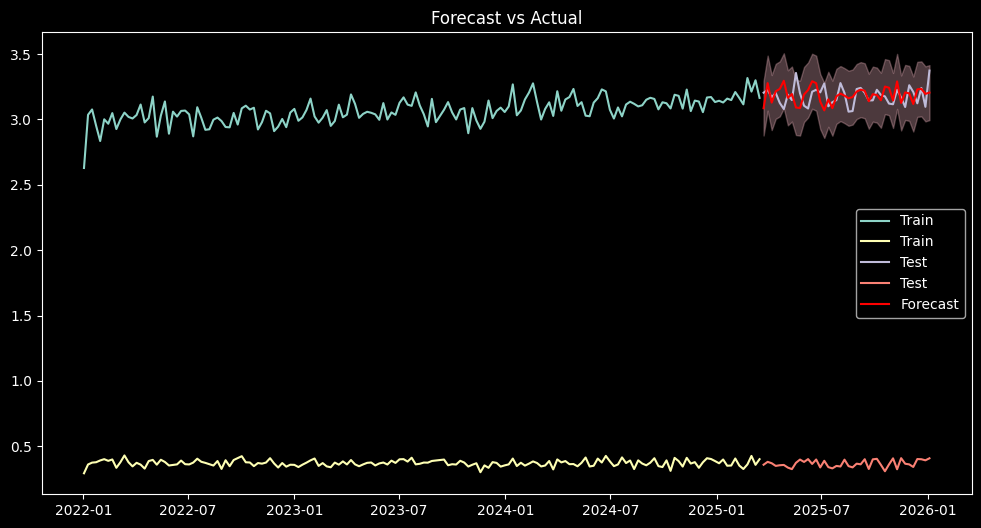

In [ ]:
# Aggregate evaluation scores and related attributes to compute
# summary statistics that support higher-level performance
# analysis and interpretation.
# Forecast

n_steps = len(test)
forecast = results_final.get_forecast(steps=n_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test")
plt.plot(test.index, forecast_mean, label="Forecast", color='red')

plt.fill_between(
    test.index,
    forecast_ci.iloc[:,0],
    forecast_ci.iloc[:,1],
    color='pink',
    alpha=0.3
)

plt.legend()
plt.title("Forecast vs Actual")
plt.show()

In [ ]:
# Aggregate evaluation scores and related attributes to compute
# summary statistics that support higher-level performance
# analysis and interpretation.

n_test = len(test)

forecast_result = results_final.get_forecast(steps=n_test)
pred_mean = forecast_result.predicted_mean
pred_ci = forecast_result.conf_int()

print("Forecast created successfully!")
print(pred_mean.head())

Forecast created successfully!
2025-03-23    3.085825
2025-03-30    3.277606
2025-04-06    3.128716
2025-04-13    3.214764
2025-04-20    3.233340
Freq: W-SUN, Name: predicted_mean, dtype: float64


In [ ]:
# Load core Python libraries required for data manipulation,
# numerical computation, and text processing used throughout
# the analysis pipeline.
# Compare Forecast VS Actual

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Align forecast with test set length
fc = forecast.predicted_mean
fc = fc.iloc[:len(Y_test)]

# --- Calculate metrics ---
rmse = np.sqrt(mean_squared_error(Y_test, fc))
mape = mean_absolute_percentage_error(Y_test, fc) * 100

print("RMSE:", rmse)
print("MAPE (%):", mape)

# --- Combine table for inspection ---
comparison = pd.DataFrame({
    "Actual": Y_test,
    "Forecast": fc
})

print("\nForecast vs Actual:")
print(comparison.head(10))

RMSE: 0.09618288067735502
MAPE (%): 2.4153499757037453

Forecast vs Actual:
              Actual  Forecast
2025-03-23  3.204663  3.085825
2025-03-30  3.224612  3.277606
2025-04-06  3.168989  3.128716
2025-04-13  3.201852  3.214764
2025-04-20  3.125985  3.233340
2025-04-27  3.079350  3.295374
2025-05-04  3.189367  3.165071
2025-05-11  3.147914  3.194064
2025-05-18  3.355652  3.091003
2025-05-25  3.199788  3.086655


# **EXPORTING TO CSV**